In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:

import seaborn as sns

In [7]:
import pandas as pd

# Load the uploaded CSV file
file_path = "amazon_alexa.csv"

# Try reading the file with default settings
try:
    df = pd.read_csv(file_path)
except Exception as e:
    df = str(e)

df


,rating\tdate\tvariation\tverified_reviews\tfeedback,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,5\t31-Jul-18\tCharcoal Fabric \tLove my Echo!\t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5\t31-Jul-18\tCharcoal Fabric \tLoved it!\t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"4\t31-Jul-18\tWalnut Finish \t""Sometimes while...",you can answer a question correctly but Alexa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"5\t31-Jul-18\tCharcoal Fabric \t""I have had a ...",i control the lights and play games like cate...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5\t31-Jul-18\tCharcoal Fabric \tMusic\t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,"5\t30-Jul-18\tBlack Dot\t""Perfect for kids","adults and everyone in between!!""\t1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3107,"5\t30-Jul-18\tBlack Dot\t""Listening to music",searching locations,checking time,looking up weather. There are many more task ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108,"5\t30-Jul-18\tBlack Dot\t""I do love these things",i have them running my entire home,TV,all my lights,my thermostat,my front door dead bolt,the cameras... and i love listening to npr. t...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,"5\t30-Jul-18\tWhite Dot\t""Only complaint I ha...",and I have another dot hooked up to my stereo...,but if you're bothered by that kind of thing ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Try reading with tab separator, allowing irregular lines
df = pd.read_csv(file_path, sep="\t", on_bad_lines="skip")

# Show first few rows and columns
df.head()


,"rating\tdate\tvariation\tverified_reviews\tfeedback,,,,,,,,,,,,,,,,,,,,"
0,5\t31-Jul-18\tCharcoal Fabric \tLove my Echo!\...
1,"5\t31-Jul-18\tCharcoal Fabric \tLoved it!\t1,,..."
2,"5\t31-Jul-18\tCharcoal Fabric \tMusic\t1,,,,,,..."
3,5\t31-Jul-18\tCharcoal Fabric \tI think this i...
4,5\t30-Jul-18\tHeather Gray Fabric \tlooks grea...


In [9]:
# Open file as plain text to inspect the first few lines
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()[:10]

lines


['\ufeff"rating\tdate\tvariation\tverified_reviews\tfeedback",,,,,,,,,,,,,,,,,,,,\n',
 '"5\t31-Jul-18\tCharcoal Fabric \tLove my Echo!\t1",,,,,,,,,,,,,,,,,,,,\n',
 '"5\t31-Jul-18\tCharcoal Fabric \tLoved it!\t1",,,,,,,,,,,,,,,,,,,,\n',
 '"4\t31-Jul-18\tWalnut Finish \t""Sometimes while playing a game"," you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.""\t1",,,,,,,,,,,,,,,,,,,\n',
 '"5\t31-Jul-18\tCharcoal Fabric \t""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs"," i control the lights and play games like categories. Has nice sound when playing music as well.""\t1",,,,,,,,,,,,,,,,,,,\n',
 '"5\t31-Jul-18\tCharcoal Fabric \tMusic\t1",,,,,,,,,,,,,,,,,,,,\n',
 '"5\t31-Jul-18\tHeather Gray Fabric \t""I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible"," and found this smart speaker. Can’t wait to s

In [10]:
# Clean and split the lines properly
cleaned_data = [line.strip().strip('"').split("\t") for line in lines[:10]]

cleaned_data


[['\ufeff"rating',
  'date',
  'variation',
  'verified_reviews',
  'feedback",,,,,,,,,,,,,,,,,,,,'],
 ['5',
  '31-Jul-18',
  'Charcoal Fabric ',
  'Love my Echo!',
  '1",,,,,,,,,,,,,,,,,,,,'],
 ['5', '31-Jul-18', 'Charcoal Fabric ', 'Loved it!', '1",,,,,,,,,,,,,,,,,,,,'],
 ['4',
  '31-Jul-18',
  'Walnut Finish ',
  '""Sometimes while playing a game"," you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.""',
  '1",,,,,,,,,,,,,,,,,,,'],
 ['5',
  '31-Jul-18',
  'Charcoal Fabric ',
  '""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs"," i control the lights and play games like categories. Has nice sound when playing music as well.""',
  '1",,,,,,,,,,,,,,,,,,,'],
 ['5', '31-Jul-18', 'Charcoal Fabric ', 'Music', '1",,,,,,,,,,,,,,,,,,,,'],
 ['5',
  '31-Jul-18',
  'Heather Gray Fabric ',
  '""I received the echo as a gift. I needed another Bluetooth or som

In [11]:
# Load and clean the entire file
cleaned_rows = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        # Strip quotes/commas, then split on tab
        row = line.strip().strip('"').split("\t")
        # Only keep the first 5 fields (ignore trailing commas)
        row = row[:5]
        cleaned_rows.append(row)

# Convert into DataFrame
df_clean = pd.DataFrame(cleaned_rows[1:], columns=[col.strip('"') for col in cleaned_rows[0][:5]])

# Show first rows
df_clean.head()


,"﻿""rating",date,variation,verified_reviews,"feedback"",,,,,,,,,,,,,,,,,,,,"
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,"1"",,,,,,,,,,,,,,,,,,,,"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,"1"",,,,,,,,,,,,,,,,,,,,"
2,4,31-Jul-18,Walnut Finish,"""""Sometimes while playing a game"","" you can an...","1"",,,,,,,,,,,,,,,,,,,"
3,5,31-Jul-18,Charcoal Fabric,"""""I have had a lot of fun with this thing. My ...","1"",,,,,,,,,,,,,,,,,,,"
4,5,31-Jul-18,Charcoal Fabric,Music,"1"",,,,,,,,,,,,,,,,,,,,"


In [12]:
# Fix column names (remove BOM and extra characters)
df_clean.columns = [col.replace("﻿", "").replace('"', "").split(",")[0].strip() for col in df_clean.columns]

# Clean the feedback column (remove trailing quotes/commas)
df_clean["feedback"] = df_clean["feedback"].str.replace(r'["\',]+', "", regex=True)

# Show cleaned dataset
df_clean.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""""Sometimes while playing a game"","" you can an...",1
3,5,31-Jul-18,Charcoal Fabric,"""""I have had a lot of fun with this thing. My ...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [13]:
# 1. Clean text & data
df_eda = df_clean.copy()

In [14]:

df_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   object
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   object
dtypes: object(5)
memory usage: 123.2+ KB


In [15]:
df_eda.describe()

,rating,date,variation,verified_reviews,feedback
count,3150,3150,3150,3150,3150
unique,5,77,16,2301,2
top,5,30-Jul-18,Black Dot,,1
freq,2286,1603,516,79,2893


In [16]:
df_eda.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [17]:
# Remove extra quotes in reviews
df_eda["verified_reviews"] = df_eda["verified_reviews"].str.replace(r'["]+', "", regex=True)

In [18]:
# Convert rating & feedback to integers
df_eda["rating"] = pd.to_numeric(df_eda["rating"], errors="coerce")
df_eda["feedback"] = pd.to_numeric(df_eda["feedback"], errors="coerce")

In [19]:
# Parse date column
df_eda["date"] = pd.to_datetime(df_eda["date"], errors="coerce")

C:\Users\acer\AppData\Local\Temp\ipykernel_4940\2409902289.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda["date"] = pd.to_datetime(df_eda["date"], errors="coerce")


In [20]:
# Drop null values
df_eda = df_eda.dropna()

In [21]:
df_eda.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [22]:
# 2. Create Sentiment column
def sentiment_from_rating(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

In [23]:
df_eda["sentiment"] = df_eda["rating"].apply(sentiment_from_rating)

In [26]:
sent_counts = df["sentiment"].value_counts()

KeyError: 'sentiment'

In [27]:
plt.figure(figsize=(6,4))
sent_counts.plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

NameError: name 'sent_counts' is not defined

<Figure size 600x400 with 0 Axes>

In [28]:
df_eda.head()

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Positive
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,2018-07-31,Charcoal Fabric,Music,1,Positive


In [29]:
# Sentiment distribution
sent_counts = df_eda["sentiment"].value_counts()

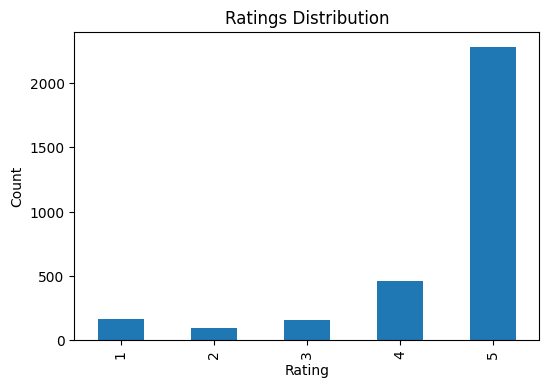

In [30]:
# Ratings distribution
plt.figure(figsize=(6,4))
df_eda["rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

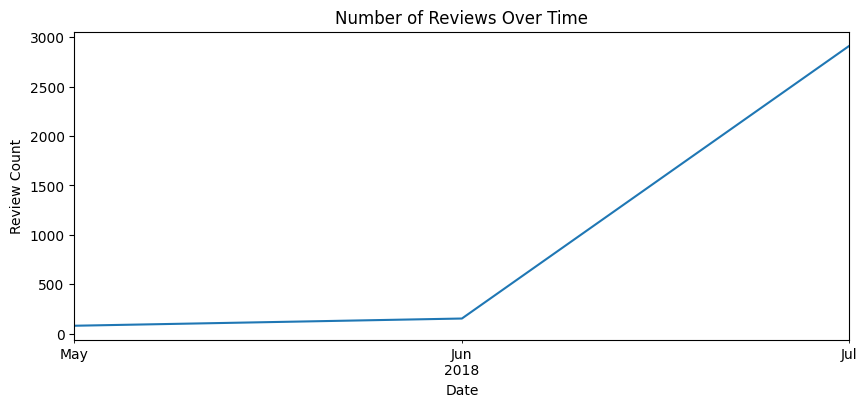

In [31]:
# Reviews over time
plt.figure(figsize=(10,4))
df_eda.groupby(df_eda["date"].dt.to_period("M")).size().plot()
plt.title("Number of Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Review Count")
plt.show()

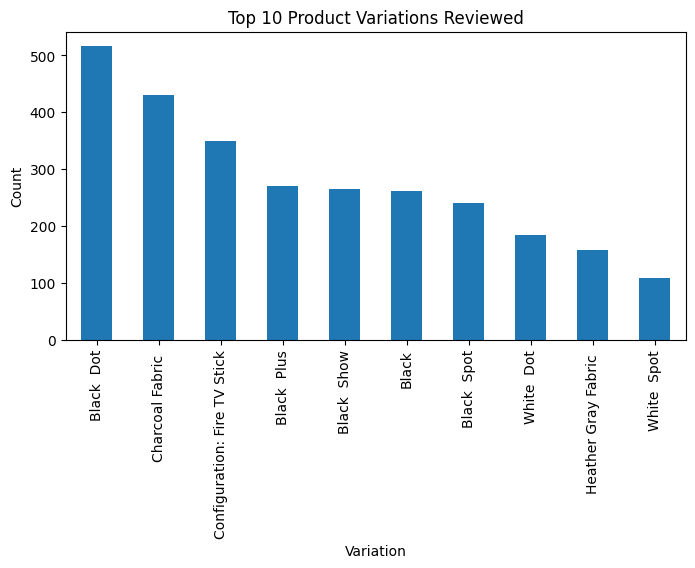

In [32]:
# Variation popularity
plt.figure(figsize=(8,4))
df_eda["variation"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Product Variations Reviewed")
plt.xlabel("Variation")
plt.ylabel("Count")
plt.show()

In [33]:
df_eda.head(50)

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Positive
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,2018-07-31,Charcoal Fabric,Music,1,Positive
5,5,2018-07-31,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,Positive
6,3,2018-07-31,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,Neutral
7,5,2018-07-31,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,Positive
8,5,2018-07-30,Heather Gray Fabric,looks great,1,Positive
9,5,2018-07-30,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,Positive


In [34]:
def rating_to_binary(r):
    try:
        r = float(r)
    except Exception:
        return np.nan
    if r >= 3:   # Neutral merged into Positive
        return "Positive"
    else:
        return "Negative"

df_eda["binary_sentiment"] = df_eda["rating"].apply(rating_to_binary)




In [35]:
df_eda = df_eda.dropna(subset=["binary_sentiment"]).reset_index(drop=True)


In [36]:
df_eda.head(50)

,rating,date,variation,verified_reviews,feedback,sentiment,binary_sentiment
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive,Positive
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Positive,Positive
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive,Positive
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive,Positive
4,5,2018-07-31,Charcoal Fabric,Music,1,Positive,Positive
5,5,2018-07-31,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,Positive,Positive
6,3,2018-07-31,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,Neutral,Positive
7,5,2018-07-31,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,Positive,Positive
8,5,2018-07-30,Heather Gray Fabric,looks great,1,Positive,Positive
9,5,2018-07-30,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,Positive,Positive


In [37]:
df_eda['binary_sentiment'].unique()


array(['Positive', 'Negative'], dtype=object)

In [38]:
import re

In [39]:
def clean_text(s: str) -> str:
    s = str(s).lower()                     # decode HTML entities
    s = re.sub(r"http\S+|www\S+", " ", s)     # remove links
    s = re.sub(r"[^a-z0-9' ]+", " ", s)       # keep only alphanumerics/apostrophes
    s = re.sub(r"\s+", " ", s).strip()        # normalize whitespace
    return s

In [40]:
df_eda["verified_reviews"] = df_eda["verified_reviews"].astype(str)

In [41]:
df_eda["text_clean"] = df_eda["verified_reviews"].apply(clean_text)

In [42]:
df_eda.head()

,rating,date,variation,verified_reviews,feedback,sentiment,binary_sentiment,text_clean
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive,Positive,love my echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Positive,Positive,loved it
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive,Positive,sometimes while playing a game you can answer ...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive,Positive,i have had a lot of fun with this thing my 4 y...
4,5,2018-07-31,Charcoal Fabric,Music,1,Positive,Positive,music


<Axes: xlabel='binary_sentiment'>

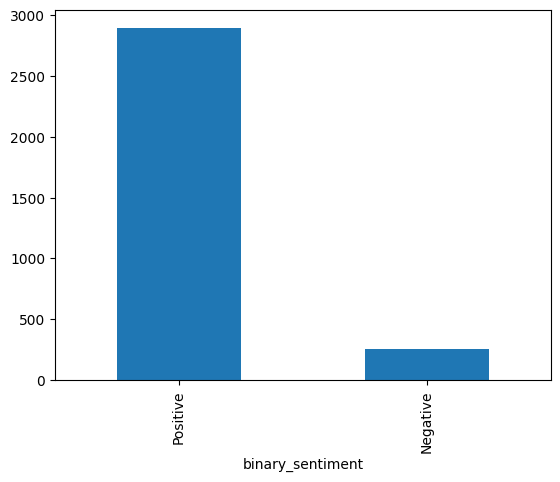

In [43]:
df_eda['binary_sentiment'].value_counts().plot(kind='bar')

In [44]:
df_eda = df_eda[['text_clean', 'binary_sentiment']]

In [45]:
df_eda.head()

,text_clean,binary_sentiment
0,love my echo,Positive
1,loved it,Positive
2,sometimes while playing a game you can answer ...,Positive
3,i have had a lot of fun with this thing my 4 y...,Positive
4,music,Positive


In [46]:
from sklearn.model_selection import train_test_split
X = df_eda["text_clean"].values
y = df_eda["binary_sentiment"].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [49]:
pipe_svm = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,3), max_features=60000, sublinear_tf=True)),
    ("clf", LinearSVC(C=2.0, class_weight="balanced"))
])

# Logistic Regression pipeline
pipe_logreg = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,3), max_features=60000, sublinear_tf=True)),
    ("clf", LogisticRegression(max_iter=300, class_weight="balanced"))
])

# Ensemble
ensemble = VotingClassifier(estimators=[
    ('svm', pipe_svm),
    ('lr', pipe_logreg)
], voting="hard")


In [50]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=60000,
                                                               ngram_range=(1,
                                                                            3),
                                                               sublinear_tf=True)),
                                              ('clf',
                                               LinearSVC(C=2.0,
                                                         class_weight='balanced'))])),
                             ('lr',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=60000,
                                                               ngram_range=(1,
                                                                            3),
                                                               sublinear_tf=True)),
                                              ('clf',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=300))]))])

In [53]:
preds = ensemble.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.9222222222222223
              precision    recall  f1-score   support

    Negative       0.52      0.59      0.55        51
    Positive       0.96      0.95      0.96       579

    accuracy                           0.92       630
   macro avg       0.74      0.77      0.75       630
weighted avg       0.93      0.92      0.92       630



In [ ]:
pipe_svm.fit(X_train, y_train)
preds = pipe_svm.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
print("Binary SVM Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Binary SVM Accuracy: 0.919047619047619
              precision    recall  f1-score   support

    Negative       0.50      0.37      0.43        51
    Positive       0.95      0.97      0.96       579

    accuracy                           0.92       630
   macro avg       0.72      0.67      0.69       630
weighted avg       0.91      0.92      0.91       630



In [ ]:
print("Binary SVM Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
max_words = 50000
max_len = 60
tok = Tokenizer(num_words=max_words, oov_token="<OOV>")
tok.fit_on_texts(X_train)

In [62]:
X_train_pad = pad_sequences(tok.texts_to_sequences(X_train), maxlen=max_len, padding="post")
X_test_pad  = pad_sequences(tok.texts_to_sequences(X_test),  maxlen=max_len, padding="post")

In [63]:
# Encode labels
y_train_bin = np.where(y_train == "Positive", 1, 0)
y_test_bin  = np.where(y_test == "Positive", 1, 0)

In [64]:
# BiLSTM Model
model = Sequential([
    Embedding(input_dim=min(max_words, len(tok.word_index)+1), output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

d:\DEEP LEARNONG\NLP AND RNN\RNN_ai\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [65]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

In [72]:
history = model.fit(
    X_train_pad, y_train_bin,
    validation_split=0.2,
    epochs=10,
    batch_size=38,
    callbacks=[es],
    verbose=1
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9464 - val_loss: 0.2817
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9945 - loss: 0.0217 - val_accuracy: 0.9425 - val_loss: 0.3311
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9956 - loss: 0.0156 - val_accuracy: 0.9444 - val_loss: 0.3725
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9464 - val_loss: 0.3922


In [73]:
print("\n[DL] BiLSTM Test Accuracy:", model.evaluate(X_test_pad, y_test_bin, verbose=0)[1])


[DL] BiLSTM Test Accuracy: 0.9301587343215942


In [74]:
# Example reviews
samples = [
    "This Alexa device is amazing, I use it every day!",
    "The sound quality is terrible and it stopped working after a week.",
    "It’s okay, not the best but works fine."
]

preds = ensemble.predict(samples)
for text, label in zip(samples, preds):
    print(f"Review: {text}\nPredicted Sentiment: {label}\n")


Review: This Alexa device is amazing, I use it every day!
Predicted Sentiment: Positive

Review: The sound quality is terrible and it stopped working after a week.
Predicted Sentiment: Negative

Review: It’s okay, not the best but works fine.
Predicted Sentiment: Positive



In [75]:
sample = ["The product is useless, I regret buying it."]

# Clean and tokenize
sample_clean = [clean_text(s) for s in sample]
sample_seq = pad_sequences(tok.texts_to_sequences(sample_clean), maxlen=max_len, padding="post")

pred = model.predict(sample_seq)[0][0]
sentiment = "Positive" if pred >= 0.5 else "Negative"
print(f"Review: {sample[0]}\nPredicted Sentiment: {sentiment} (score={pred:.3f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Review: The product is useless, I regret buying it.
Predicted Sentiment: Negative (score=0.072)


In [78]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [79]:
# After training
import os
import pickle


texts = ["sample text one", "sample text two"]  # Replace with your real data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)

# --- 1. Choose a folder for artifacts ---
BASE_DIR = os.getcwd()                     # Current notebook folder
ARTIFACT_DIR = os.path.join(BASE_DIR, "artifacts")
os.makedirs(ARTIFACT_DIR, exist_ok=True)   # Create folder if it doesn’t exist

# --- 2. Paths for saving ---
MODEL_PATH = os.path.join(ARTIFACT_DIR, "model.h5")
TOKENIZER_PATH = os.path.join(ARTIFACT_DIR, "tokenizer.pkl")

# --- 3. Save model ---
model.save(MODEL_PATH)

# --- 4. Save tokenizer ---
with open(TOKENIZER_PATH, "wb") as f:
    pickle.dump(tokenizer, f)

print(f"Model saved at: {MODEL_PATH}")
print(f"Tokenizer saved at: {TOKENIZER_PATH}")


Model saved at: d:\Web Scapping Project\artifacts\model.h5
Tokenizer saved at: d:\Web Scapping Project\artifacts\tokenizer.pkl


In [80]:
from tensorflow.keras.models import load_model
import pickle
import os

# Paths
BASE_DIR = os.getcwd()
ARTIFACT_DIR = os.path.join(BASE_DIR, "artifacts")
MODEL_PATH = os.path.join(ARTIFACT_DIR, "model.h5")
TOKENIZER_PATH = os.path.join(ARTIFACT_DIR, "tokenizer.pkl")

# Load model
model = load_model(MODEL_PATH)

# Load tokenizer
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

print("Model and tokenizer loaded successfully!")


Model and tokenizer loaded successfully!
